# BioPython
Biopython is a large python module for performing common procedures in bioinformatics, including e.g. analysis of sequences.

http://biopython.org/

# Retrieve a sequence from UniProt

In [1]:
accession = 'Q9BV79'

## Annotations

In [2]:
from Bio import ExPASy
from Bio import SwissProt

handle = ExPASy.get_sprot_raw(accession) # download data from UniProt
record = SwissProt.read(handle) # parse (interpret) the data

In [3]:
print(record.description)

RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial {ECO:0000305}; EC=1.3.1.104 {ECO:0000305|PubMed:12654921, ECO:0000305|PubMed:18479707}; AltName: Full=2-enoyl thioester reductase; AltName: Full=Nuclear receptor-binding factor 1; Short=HsNrbf-1; Short=NRBF-1; Flags: Precursor;


In [4]:
print(help(record))

Help on Record in module Bio.SwissProt object:

class Record(builtins.object)
 |  Holds information from a SwissProt record.
 |  
 |  Attributes:
 |   - entry_name        Name of this entry, e.g. RL1_ECOLI.
 |   - data_class        Either 'STANDARD' or 'PRELIMINARY'.
 |   - molecule_type     Type of molecule, 'PRT',
 |   - sequence_length   Number of residues.
 |   - accessions        List of the accession numbers, e.g. ['P00321']
 |   - created           A tuple of (date, release).
 |   - sequence_update   A tuple of (date, release).
 |   - annotation_update A tuple of (date, release).
 |   - description       Free-format description.
 |   - gene_name         Gene name.  See userman.txt for description.
 |   - organism          The source of the sequence.
 |   - organelle         The origin of the sequence.
 |   - organism_classification  The taxonomy classification.  List of strings.
 |     (http://www.ncbi.nlm.nih.gov/Taxonomy/)
 |   - taxonomy_id       A list of NCBI taxonomy id's.

## Structures available?

In [5]:
for cross_ref in record.cross_references:
    if cross_ref[0] == 'PDB':
        print(cross_ref)

('PDB', '1ZSY', 'X-ray', '1.75 A', 'A=40-373')
('PDB', '2VCY', 'X-ray', '2.41 A', 'A/B=31-373')


In [6]:
pdb_codes = []
for cross_ref in record.cross_references:
    if cross_ref[0] == 'PDB':
        pdb_codes.append(cross_ref[1])

print(pdb_codes)

['1ZSY', '2VCY']


## Sequence

In [7]:
print(record.sequence)

MWVCSTLWRVRTPARQWRGLLPASGCHGPAASSYSASAEPARVRALVYGHHGDPAKVVELKNLELAAVRGSDVRVKMLAAPINPSDINMIQGNYGFLPELPAVGGNEGVAQVVAVGSNVTGLKPGDWVIPANAGLGTWRTEAVFSEEALIQVPSDIPLQSAATLGVNPCTAYRMLMDFEQLQPGDSVIQNASNSGVGQAVIQIAAALGLRTINVVRDRPDIQKLSDRLKSLGAEHVITEEELRRPEMKNFFKDMPQPRLALNCVGGKSSTELLRQLARGGTMVTYGGMAKQPVVASVSLLIFKDLKLRGFWLSQWKKDHSPDQFKELILTLCDLIRRGQLTAPACSQVPLQDYQSALEASMKPFISSKQILTM


In [8]:
sequence = record.sequence
print('>', record.entry_name, record.accessions[0])
print(record.sequence)


> MECR_HUMAN Q9BV79
MWVCSTLWRVRTPARQWRGLLPASGCHGPAASSYSASAEPARVRALVYGHHGDPAKVVELKNLELAAVRGSDVRVKMLAAPINPSDINMIQGNYGFLPELPAVGGNEGVAQVVAVGSNVTGLKPGDWVIPANAGLGTWRTEAVFSEEALIQVPSDIPLQSAATLGVNPCTAYRMLMDFEQLQPGDSVIQNASNSGVGQAVIQIAAALGLRTINVVRDRPDIQKLSDRLKSLGAEHVITEEELRRPEMKNFFKDMPQPRLALNCVGGKSSTELLRQLARGGTMVTYGGMAKQPVVASVSLLIFKDLKLRGFWLSQWKKDHSPDQFKELILTLCDLIRRGQLTAPACSQVPLQDYQSALEASMKPFISSKQILTM


## Multiple proteins

In [9]:
accessions = ['P97584', 'P00328', 'P19096', 'S0DRI1', 'A2R6H1', 'Q29073', 'P34055', 'Q24K16', 'W7LKX1', 
              'P38230', 'Q4W4Z2', 'W7MT31', 'Q64413', 'Q9Z2M2', 'P00327', 'P49327', 'P12785', 'Q9SLN8',
              'A0A0D2YG10', 'P79896', 'P26646', 'P0DN30', 'F2Z678', 'Q9P6C8', 'O57380', 'P22797']

In [10]:
for accession in accessions:
    handle = ExPASy.get_sprot_raw(accession) # download data from UniProt
    record = SwissProt.read(handle) # parse (interpret) the data
    pdb_codes = []
    for cross_ref in record.cross_references:
        if cross_ref[0] == 'PDB':
            pdb_codes.append(cross_ref[1])
    if len(pdb_codes) > 0: # if any structures were found
        print(accession)
        print(', '.join(pdb_codes))
        print()

P00328
1EE2

P38230
3QWA, 3QWB

P00327
1A71, 1A72, 1ADB, 1ADC, 1ADF, 1ADG, 1AXE, 1AXG, 1BTO, 1HET, 1HEU, 1HF3, 1HLD, 1JU9, 1LDE, 1LDY, 1MG0, 1MGO, 1N8K, 1N92, 1P1R, 1QLH, 1QLJ, 1QV6, 1QV7, 1YE3, 2JHF, 2JHG, 2OHX, 2OXI, 3BTO, 3OQ6, 4DWV, 4DXH, 4NFH, 4NFS, 4NG5, 4XD2, 5ADH, 5CDG, 5CDS, 5CDT, 5CDU, 5KCP, 5KCZ, 5KJ1, 5KJ6, 5KJC, 5KJE, 5KJF, 5VJ5, 5VJG, 5VKR, 5VL0, 5VN1, 6ADH, 7ADH, 8ADH

P49327
1XKT, 2CG5, 2JFD, 2JFK, 2PX6, 3HHD, 3TJM, 4PIV, 4W82, 4W9N, 4Z49, 5C37

P12785
2PNG

Q9SLN8
4HFJ, 4HFM, 4HFN

P26646
1O89, 1O8C

O57380
1P0C, 1P0F



# BLAST

In [11]:
query_fasta = sequence
print(query_fasta)

MWVCSTLWRVRTPARQWRGLLPASGCHGPAASSYSASAEPARVRALVYGHHGDPAKVVELKNLELAAVRGSDVRVKMLAAPINPSDINMIQGNYGFLPELPAVGGNEGVAQVVAVGSNVTGLKPGDWVIPANAGLGTWRTEAVFSEEALIQVPSDIPLQSAATLGVNPCTAYRMLMDFEQLQPGDSVIQNASNSGVGQAVIQIAAALGLRTINVVRDRPDIQKLSDRLKSLGAEHVITEEELRRPEMKNFFKDMPQPRLALNCVGGKSSTELLRQLARGGTMVTYGGMAKQPVVASVSLLIFKDLKLRGFWLSQWKKDHSPDQFKELILTLCDLIRRGQLTAPACSQVPLQDYQSALEASMKPFISSKQILTM


In [12]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

# Use BLAST at NCBI
result_handle = NCBIWWW.qblast("blastp", "swissprot", query_fasta)

# parse the BLAST result
blast_record = NCBIXML.read(result_handle)

In [13]:
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
       print('****Alignment****')
       print('sequence:', alignment.title)
       print('length:', alignment.length)
       print('e value:', hsp.expect)

****Alignment****
sequence: gi|334302832|sp|Q9BV79.2|MECR_HUMAN RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial; AltName: Full=2-enoyl thioester reductase; AltName: Full=Nuclear receptor-binding factor 1; Short=HsNrbf-1; Short=NRBF-1; Flags: Precursor
length: 373
e value: 0.0
****Alignment****
sequence: gi|62900582|sp|Q7YS70.1|MECR_BOVIN RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial; AltName: Full=2-enoyl thioester reductase; AltName: Full=Nuclear receptor-binding factor 1; Short=BtNrbf-1; Short=NRBF-1; Flags: Precursor
length: 373
e value: 0.0
****Alignment****
sequence: gi|62900598|sp|Q9DCS3.2|MECR_MOUSE RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial; AltName: Full=2-enoyl thioester reductase; AltName: Full=Nuclear receptor-binding factor 1; Short=NRBF-1; Flags: Precursor
length: 373
e value: 0.0
****Alignment****
sequence: gi|62900383|sp|Q9Z311.1|MECR_RAT RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondria

In [14]:
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        if hsp.expect < 10**-20:
            print(alignment.title)

gi|334302832|sp|Q9BV79.2|MECR_HUMAN RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial; AltName: Full=2-enoyl thioester reductase; AltName: Full=Nuclear receptor-binding factor 1; Short=HsNrbf-1; Short=NRBF-1; Flags: Precursor
gi|62900582|sp|Q7YS70.1|MECR_BOVIN RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial; AltName: Full=2-enoyl thioester reductase; AltName: Full=Nuclear receptor-binding factor 1; Short=BtNrbf-1; Short=NRBF-1; Flags: Precursor
gi|62900598|sp|Q9DCS3.2|MECR_MOUSE RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial; AltName: Full=2-enoyl thioester reductase; AltName: Full=Nuclear receptor-binding factor 1; Short=NRBF-1; Flags: Precursor
gi|62900383|sp|Q9Z311.1|MECR_RAT RecName: Full=Enoyl-[acyl-carrier-protein] reductase, mitochondrial; AltName: Full=2-enoyl thioester reductase; AltName: Full=Nuclear receptor-binding factor 1; Short=NRBF-1; Flags: Precursor
gi|62900529|sp|Q6GQN8.2|MECR_DANRE RecName: Full=Enoyl-[acyl-

In [15]:
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        if hsp.expect < 10**-20:
            print(alignment.title.split('|')[3])

Q9BV79.2
Q7YS70.1
Q9DCS3.2
Q9Z311.1
Q6GQN8.2
Q28GQ2.1
Q9V6U9.2
Q8LCU7.1
Q54YT4.1
O45903.1
Q10488.1
Q9XXC8.1
Q6CBE4.1
Q8WZM4.1
Q8WZM3.1
Q6BV30.1
Q6FXN7.2
Q8NJJ9.1
Q6CIR6.1
P38071.3
Q757U3.2
Q6BLV6.2


In [16]:
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        if hsp.expect < 10**-20:
            raw_accession = alignment.title.split('|')[3]
            print(raw_accession[:raw_accession.index('.')])

Q9BV79
Q7YS70
Q9DCS3
Q9Z311
Q6GQN8
Q28GQ2
Q9V6U9
Q8LCU7
Q54YT4
O45903
Q10488
Q9XXC8
Q6CBE4
Q8WZM4
Q8WZM3
Q6BV30
Q6FXN7
Q8NJJ9
Q6CIR6
P38071
Q757U3
Q6BLV6


In [17]:
blast_accessions = []

for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        if hsp.expect < 10**-20:
            raw_accession = alignment.title.split('|')[3]
            blast_accessions.append(raw_accession[:raw_accession.index('.')])
    
    
print(blast_accessions)

['Q9BV79', 'Q7YS70', 'Q9DCS3', 'Q9Z311', 'Q6GQN8', 'Q28GQ2', 'Q9V6U9', 'Q8LCU7', 'Q54YT4', 'O45903', 'Q10488', 'Q9XXC8', 'Q6CBE4', 'Q8WZM4', 'Q8WZM3', 'Q6BV30', 'Q6FXN7', 'Q8NJJ9', 'Q6CIR6', 'P38071', 'Q757U3', 'Q6BLV6']


In [18]:
for accession in blast_accessions:
    handle = ExPASy.get_sprot_raw(accession) # download data from UniProt
    record = SwissProt.read(handle) # parse (interpret) the data
    pdb_codes = []
    for cross_ref in record.cross_references:
        if cross_ref[0] == 'PDB':
            pdb_codes.append(cross_ref[1])
    if len(pdb_codes) > 0: # if any structures were found
        print(accession)
        print(', '.join(pdb_codes))
        print()

Q9BV79
1ZSY, 2VCY

Q8WZM4
1H0K, 1N9G

Q8WZM3
1GU7, 1GUF, 1GYR, 1N9G, 4W99, 4WAS, 5LB9, 5LBX



# Multiple sequence alignment

## Get sequences

In [19]:
fasta_sequences = []
for accession in blast_accessions:
    handle = ExPASy.get_sprot_raw(accession) # download data from UniProt
    record = SwissProt.read(handle)
    fasta_sequences.append('> ' + record.entry_name + ' ' + record.accessions[0] + '\n'
                            + record.sequence + '\n') # \n = newline
for sequence in fasta_sequences:
    print(sequence)

> MECR_HUMAN Q9BV79
MWVCSTLWRVRTPARQWRGLLPASGCHGPAASSYSASAEPARVRALVYGHHGDPAKVVELKNLELAAVRGSDVRVKMLAAPINPSDINMIQGNYGFLPELPAVGGNEGVAQVVAVGSNVTGLKPGDWVIPANAGLGTWRTEAVFSEEALIQVPSDIPLQSAATLGVNPCTAYRMLMDFEQLQPGDSVIQNASNSGVGQAVIQIAAALGLRTINVVRDRPDIQKLSDRLKSLGAEHVITEEELRRPEMKNFFKDMPQPRLALNCVGGKSSTELLRQLARGGTMVTYGGMAKQPVVASVSLLIFKDLKLRGFWLSQWKKDHSPDQFKELILTLCDLIRRGQLTAPACSQVPLQDYQSALEASMKPFISSKQILTM

> MECR_BOVIN Q7YS70
MWVCGALCRTRAPAQLGQRLLPESRRRRPASASFSASAEPSRVRALVYGHHGDPAKVVELKNLELAAVGGSHVHVKMLAAPINPSDINMIQGNYGLLPQLPAVGGNEGVGQVVAVGSGVTGVKPGDWVIPANPGLGTWRTEAVFGEEELITVPSDIPLQSAATLGVNPCTAYRMLVDFERLRPRDSIIQNASNSGVGQAVIQIAAARGLRTINVLRDTPDLQKLTDTLKNLGANHVVTEEELRKPEMKSFFKDVPQPRLALNCVGGKSSTELLRHLAPGGTMVTYGGMAKQPVIASVSQLIFKDLKLRGFWLSQWKKDHSPDQFKELILTLCDLIRRGQLTAPACSEVPLQDYLCALEASTQPFVSSKQILTM

> MECR_MOUSE Q9DCS3
MLVSQRVTGARARAPQLAGLLEAWYRHGRTTSSYSALSEPSRVRALVYGNHGDPAKVVQLKNLELTAVEGSDVHVRMLAAPINPSDINMIQGNYGLLPKLPAVGGNEGVGQVIAVGSSVSALKPGDWVIPANAGLGTWRTEAVFSEEALIGIPKDIPLQSAATLGVNPCTAYRMLVDFEQLQPGDSVIQN

In [20]:
outfile = open('blast_hits.fasta', 'w')
for sequence in fasta_sequences:
        outfile.write(sequence)

### Make multiple sequence alignment in Clustal Omega

In [21]:
# using clustal omega externally
!clustalo -i blast_hits.fasta -o blast_hits.cali --force

### Continue with analysis

In [22]:
from Bio import AlignIO
alignment = AlignIO.read("blast_hits.cali", "fasta")

In [23]:
for seq in alignment:
    print(seq.seq[:100])

------MW-VCSTL--WRVRTPARQWRGLLPASGCHGPA-ASSYSASAEPARVRALVYGHHGD--PAKVVELKNLELA-A-VRGSDVRVKMLAAPINPSD
------MW-VCGAL--CRTRAPAQLGQRLLPESRRRRPA-SASFSASAEPSRVRALVYGHHGD--PAKVVELKNLELA-A-VGGSHVHVKMLAAPINPSD
------ML-VSQRV--TGARARAPQLAGLLEAWYRHGRT-TSSYSALSEPSRVRALVYGNHGD--PAKVVQLKNLELT-A-VEGSDVHVRMLAAPINPSD
------ML-VSRRL--TGARARAPLLASLLEAWCRQGRT-TSSYSAFSEPSHVRALVYGNHGD--PAKVIQLKNLELT-A-VEGSDVHVKMLAAPINPSD
MKLPSVAS-LLIRV--YRTTGPVSHIQR----IRHGAVL-NKNYSSVSAVKNCTALLYRNHGE--PSQVVQLESLDLP-Q-VGAECVLVKMLAAPINPSD
------MW-LGLRL-----------------------------FHRPFSSLAARGLVYEKHGE--PLQVLRLKNVNIT-H-PADNEVRVKMLAAPINPSD
---------MLRRG--FLSRIN------------------AAQWS-RQMSVVAKSLKYTQHGE--PQEVLQLVEDKLP-D-PKDNQVLVKILAAPINPAD
--MAALMESVVGRALKFSSTANFRSIRR----GETPTLC-IKSFS-TIMSPPSKAIVYEEHGS--PDSVTRLVNLPPV-E-VKENDVCVKMIAAPINPSD
-----------------------------------MNST-RNIISLVRRYSTSRSVKIASHGS--PSTALKIENENIT-DKISNKDVLVEMLHAPINPAD
------ML-----------------------------KV-LSLRSALQRAASTRQLVYEGYRN--PPEAIQLKTVTIA-DKPSADQVLVQW

In [24]:
from Bio.Align import AlignInfo

summary_align = AlignInfo.SummaryInfo(alignment)

## Consensus sequence

In [25]:
summary_align.dumb_consensus()

Seq('MKXXXXMXXXXXRXLKXXXRXXXXXXXXLLXXXXXXXXXXXXXXXXXXXXXXXX...SHI', SingleLetterAlphabet())

## PSSM

In [26]:
pssm = summary_align.pos_specific_score_matrix()

print(pssm)

    -   A   C   D   E   F   G   H   I   K   L   M   N   P   Q   R   S   T   V   W   Y
M  20.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
K  20.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
X  19.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
X  19.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
X  19.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
X  19.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
M  6.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 14.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
X  6.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 3.0 3.0
X  13.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 5.0 0.0 0.0 0.0 0.0
X  5.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 3.0 2.0 1.0 0.0 0.0 0.0 0.0 1.0 7.0 0.0 0.0
X  13.0 0.0 2.0 0.0 0.0 0.0 1.0 0.0 

In [27]:
for position in pssm:
    print(max(position.values())/len(alignment))

0.9523809523809523
0.9523809523809523
0.9047619047619048
0.9047619047619048
0.9047619047619048
0.9047619047619048
0.6666666666666666
0.2857142857142857
0.6190476190476191
0.3333333333333333
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.6190476190476191
0.9523809523809523
0.9523809523809523
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.7142857142857143
0.7142857142857143
0.7142857142857143
0.7142857142857143
0.7142857142857143
0.7142857142857143
0.8095238095238095
0.42857142857142855
0.47619047619047616
0.3333333333333333
0.3333333333333333
0.23809523809523808
0.23809523809523808
0.19047619047619047
0.3333333333333333
0.38095238095238093
0.23809523809523808
0.6190476190476191
0.19047619047619047
0.47619047619047616
0.47619047619047616
0.19047619047619047
0.5238095238095238
0.3333333333333333
0.2857142857142857
0.2857142857142857
0.23809523809523808
0.3333333333333333
0.2857142857142857
0.19047619047619047

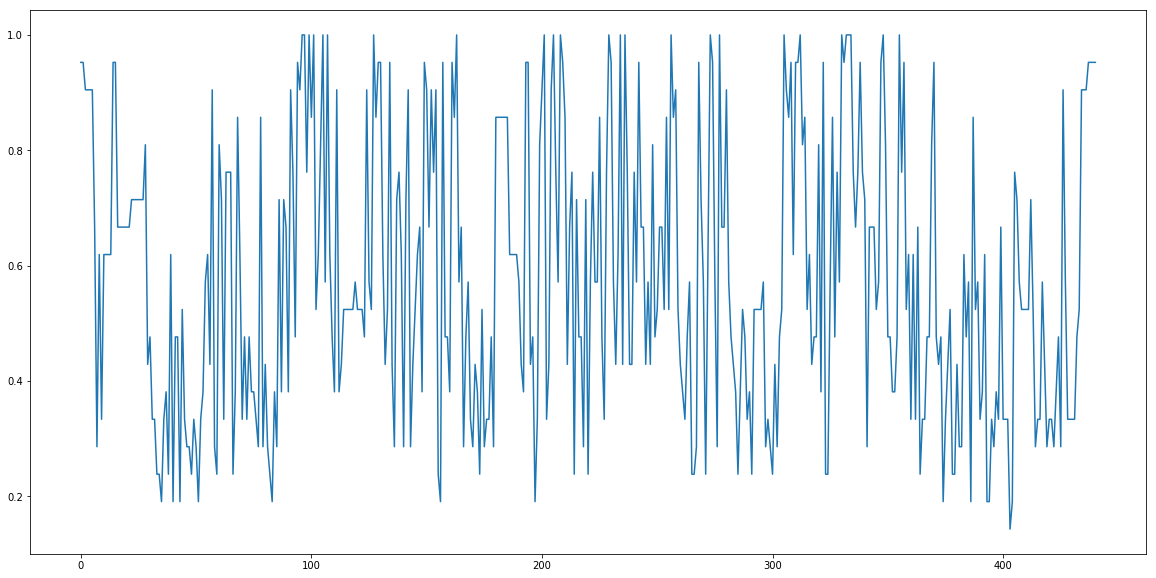

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline


values = []
for position in pssm:
    values.append(max(position.values())/len(alignment))
    
fig = plt.figure(figsize = (20, 10))
plt.plot(values)

# Assignment 1

## Handle sequences and perform alignment

In [29]:
handle = ExPASy.get_sprot_raw('P08686')
record = SwissProt.read(handle)

cyp21_seq = ('> ' + record.entry_name + ' ' + record.accessions[0] + '\n'
                + record.sequence + '\n') # parantheses needed when making multiline string outside function

mut_seq = '''>cyp21a2_translated_mut
MLLLGLLLLLPLLAGARLLWNWWKLRSLHLPPLAPGFLHLLQPDLPIYLLGLTQKFGPIY
RLHLGLQDVVVLNSKRTIEEAMVKKWADFAGRPEPLTYRLVSKNYPDLSLGDYSLLWKAH
KKLTRSALLLGIRDSMEPVVEQLTQEFCERMRAQPGTPVAIEEEFSLLTCSIICYLTFGD
KIKDDNLMPAYYKCIQEVLKTWSHWSIQIVDVIPFLRFFPNPGLRRLKQAIEKRDHIVEM
QLRQHKESLVAGQWRDMMDYMLQGVAQPSMEEGSGQLLEGHVHMAAVDLLISGTETTANT
LSWAVVFLLHHPEIQQRLQEELDHELGPGASSSRVPYKDRARLPLLNATIAEVLRLRPVV
PLALPHRTTRPSSISGYDIPEGTVIIPNLQGAHLDETVWERPHEFWPDRFLEPGKNSRAL
AFGCGARVRLGEPLARLELFVVLTRLLQAFTLLPSGDALPSLQPLPHCSVILKMQPFQVR
LQPRGMGAHSPGQNQ'''

with open('cyp21_comparison.fasta', 'w') as outfile:
    outfile.write(cyp21_seq)
    outfile.write(mut_seq)

In [30]:
# kalign used externally
! kalign cyp21_comparison.fasta > cyp21_comparison.kali 2> /dev/null

## Find mutations

In [31]:
from Bio import AlignIO
alignment = AlignIO.read("cyp21_comparison.kali", "fasta")

print('Pos\tCYP21\tMut')
muts = []
prot_pos = 0
positions = []
for i in range(len(alignment[0])):
    if alignment[0][i] != alignment[1][i]:
        muts.append([str(prot_pos+1), alignment[0][i], alignment[1][i]])
        positions.append(prot_pos+1)
        print('\t'.join(muts[-1]))
    if alignment[0][i] != '-':
        prot_pos += 1


Pos	CYP21	Mut
6	-	L
98	K	R
291	G	S
428	C	R


## Look for information in UniProt

In [32]:
handle = ExPASy.get_sprot_raw('P08686')
record = SwissProt.read(handle)

In [33]:
for feature in record.features:
    if feature[1] in positions:
        print(feature)

('METAL', 428, 428, 'Iron (heme axial ligand). {ECO:0000269|PubMed:25855791}.', '')
('VAR_SEQ', 6, 6, 'L -> LL (in isoform 2). {ECO:0000303|PubMed:14702039}.', 'VSP_046264')
('VARIANT', 98, 98, 'K -> R.', 'VAR_001282')
('VARIANT', 291, 291, 'G -> C (in AH3). {ECO:0000269|PubMed:10364682}.', 'VAR_026068')
('VARIANT', 291, 291, 'G -> R (in AH3; dbSNP:rs201552310). {ECO:0000269|PubMed:12915679}.', 'VAR_018365')
('VARIANT', 291, 291, 'G -> S (in AH3; salt wasting form; less then 1% activity; dbSNP:rs201552310). {ECO:0000269|PubMed:10408778, ECO:0000269|PubMed:11600539, ECO:0000269|PubMed:1496017, ECO:0000269|PubMed:15110320, ECO:0000269|PubMed:20080860, ECO:0000269|PubMed:9497336}.', 'VAR_001293')
('MUTAGEN', 428, 428, 'C->M,S,T: Loss of activity and loss of P450 absorption. {ECO:0000269|PubMed:1864962}.', '')


In [34]:
for feature in record.features:
    if feature[1] in positions:
        print('\t'.join([str(feature[1]), feature[3][:100]]))

428	Iron (heme axial ligand). {ECO:0000269|PubMed:25855791}.
6	L -> LL (in isoform 2). {ECO:0000303|PubMed:14702039}.
98	K -> R.
291	G -> C (in AH3). {ECO:0000269|PubMed:10364682}.
291	G -> R (in AH3; dbSNP:rs201552310). {ECO:0000269|PubMed:12915679}.
291	G -> S (in AH3; salt wasting form; less then 1% activity; dbSNP:rs201552310). {ECO:0000269|PubMed:10
428	C->M,S,T: Loss of activity and loss of P450 absorption. {ECO:0000269|PubMed:1864962}.
